# Data Cleaning and Manipulation Activity
In this activity, you'll clean and prepare two datasets, **Product Inventory** and **Sales Data**, for analysis. 

## Task 1: Data Import
1. Import the datasets.
    - For the CSV file: Use read_csv. 
    - For the Excel file: Use read_excel.
2. Inspects the structure of the datasets.

In [131]:
import pandas as pd  # Pandas library for data manipulation

sales_data =  pd.read_csv("C:/Users/arulr/DA course/Python/Data Preprocessing/LAB/data_cleaning_manipulation/data/sales_data.csv") # Load the sales data CSV file
inventory_data = pd.read_excel("C:/Users/arulr/DA course/Python/Data Preprocessing/LAB/data_cleaning_manipulation/data/product_inventory.xlsx") # Load the inventory data Excel file

# Inspect the sales data
print("Sales Data Info:")
print(sales_data.info())  # Inspect structure and data types of sales data
print(sales_data.head())  # View the first few rows of sales data

# Inspect the inventory data
print("\nInventory Data Info:")
print(inventory_data.info())  # Inspect structure and data types of inventory data
print(inventory_data.head())  # View the first few rows of inventory data

Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SaleID      5 non-null      int64  
 1   Product_ID  5 non-null      int64  
 2   Quantity    5 non-null      int64  
 3   Price       4 non-null      float64
 4   SaleDate    5 non-null      object 
dtypes: float64(1), int64(3), object(1)
memory usage: 332.0+ bytes
None
   SaleID  Product_ID  Quantity  Price    SaleDate
0       1         101         2  19.99  2024-11-01
1       2         102         1  29.99  2024-11-02
2       3         103         3    NaN  2024-11-03
3       4         101         5  19.99  2024-11-04
4       5         104         2  39.99  2024-11-05

Inventory Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID

## Task 2: Data Cleaning
1. Clean the data.

    - When cleaning data, look incosistent format issues and consider the appropriate methods to address them.
    - Focus on making the datasets as complete and compatible as possible before moving to the next step. 
    - Test your work by inspecting the datasets after cleaning.

**Checklist:**

-   Have you checked for and handled missing values?
-   Have you removed duplicate rows if necessary?
-   Are all columns in the correct format?
-   Are column names consistent across datasets?

## Data Cleaning for Sales_data

In [134]:
sales_data.isna().sum() #checking for null values

SaleID        0
Product_ID    0
Quantity      0
Price         1
SaleDate      0
dtype: int64

<Axes: >

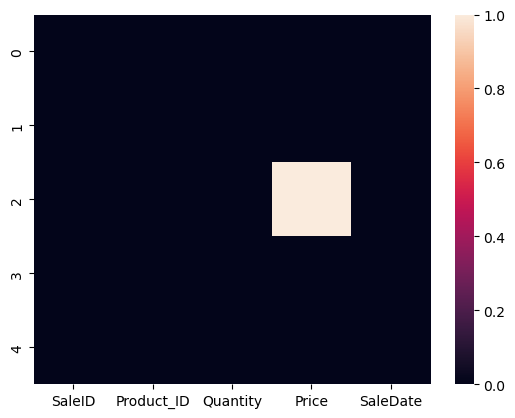

In [135]:
import seaborn as sns
sns.heatmap(sales_data.isna()) #checking for null values using heat map

In [136]:
#Filling the missing values using median
medianp=round(sales_data['Price'].median(),2) # Finding the mean of price column
medianp

24.99

In [137]:
# Fill the computed mean value on the missing field
#sales_data['Price'].fillna(meanp,inplace=True) .fillna(..., inplace=True) on a column is not guaranteed to modify the original DataFrame safely. It modifies a temporary copy, not the original column.
sales_data.fillna({'Price': medianp}, inplace=True)
sales_data

,SaleID,Product_ID,Quantity,Price,SaleDate
0,1,101,2,19.99,2024-11-01
1,2,102,1,29.99,2024-11-02
2,3,103,3,24.99,2024-11-03
3,4,101,5,19.99,2024-11-04
4,5,104,2,39.99,2024-11-05


In [138]:
# check for duplicates
sales_data.duplicated().sum() #result is 0. so no duplicates

0

In [139]:
#Rename column_name inconsistency across datasets. Product_ID in "Sales Data" ProductID in "Inventory Data"
# we will rename Product_ID as ProductID
sales_data.rename(columns={"Product_ID":"ProductID"},inplace=True)
sales_data

,SaleID,ProductID,Quantity,Price,SaleDate
0,1,101,2,19.99,2024-11-01
1,2,102,1,29.99,2024-11-02
2,3,103,3,24.99,2024-11-03
3,4,101,5,19.99,2024-11-04
4,5,104,2,39.99,2024-11-05


In [140]:
sales_data.info() #In the info salesdate should be in date format, but it is rep as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SaleID     5 non-null      int64  
 1   ProductID  5 non-null      int64  
 2   Quantity   5 non-null      int64  
 3   Price      5 non-null      float64
 4   SaleDate   5 non-null      object 
dtypes: float64(1), int64(3), object(1)
memory usage: 332.0+ bytes


In [141]:
sales_data=sales_data.convert_dtypes()  # converting all data into proper datatype. This wont work for date column
sales_data['SaleDate'] = pd.to_datetime(sale_data['SaleDate'], errors='coerce') #convert datatype of datetime column
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SaleID     5 non-null      Int64         
 1   ProductID  5 non-null      Int64         
 2   Quantity   5 non-null      Int64         
 3   Price      5 non-null      Float64       
 4   SaleDate   5 non-null      datetime64[ns]
dtypes: Float64(1), Int64(3), datetime64[ns](1)
memory usage: 352.0 bytes


In [142]:
print("\nCleaned Sales Data:")
print(sales_data)


Cleaned Sales Data:
   SaleID  ProductID  Quantity  Price   SaleDate
0       1        101         2  19.99 2024-11-01
1       2        102         1  29.99 2024-11-02
2       3        103         3  24.99 2024-11-03
3       4        101         5  19.99 2024-11-04
4       5        104         2  39.99 2024-11-05


### Data Cleaning for inventory_data

In [198]:
inventory_data.isna().sum() #checking for null values ;No null values

ProductID      0
ProductName    0
Stock          0
dtype: int64

In [145]:
# check for duplicates
inventory_data.duplicated().sum() #result is 0. so no duplicates

0

In [146]:
inventory_data.info() # check for datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    5 non-null      int64 
 1   ProductName  5 non-null      object
 2   Stock        5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [147]:
# You can see ProductName should be string not object
inventory_data=inventory_data.convert_dtypes()
inventory_data.info()                            # its converted to string now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ProductID    5 non-null      Int64 
 1   ProductName  5 non-null      string
 2   Stock        5 non-null      Int64 
dtypes: Int64(2), string(1)
memory usage: 262.0 bytes


In [148]:
print("\nCleaned inventory Data:")
print(inventory_data)


Cleaned inventory Data:
   ProductID    ProductName  Stock
0        101       Widget A     10
1        102       Gadget B      5
2        103  Thingamajig C      7
3        104    Doohickey D      8
4        105  Contraption E      3


## Task 3: Data Merging
1. Merge the sales and inventory data.

In [151]:

# Task 3: Data Merging
# Merge sales and inventory data
# TODO: Merge the datasets. Replace ColumnName with the key column name
merged_data = pd.merge(sales_data, inventory_data, on='ProductID', how='left') 

# Inspect merged data
print("\nMerged Data Info:")
print(merged_data.info())
print(merged_data.head())
    


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   SaleID       5 non-null      Int64         
 1   ProductID    5 non-null      Int64         
 2   Quantity     5 non-null      Int64         
 3   Price        5 non-null      Float64       
 4   SaleDate     5 non-null      datetime64[ns]
 5   ProductName  5 non-null      string        
 6   Stock        5 non-null      Int64         
dtypes: Float64(1), Int64(4), datetime64[ns](1), string(1)
memory usage: 437.0 bytes
None
   SaleID  ProductID  Quantity  Price   SaleDate    ProductName  Stock
0       1        101         2  19.99 2024-11-01       Widget A     10
1       2        102         1  29.99 2024-11-02       Gadget B      5
2       3        103         3  24.99 2024-11-03  Thingamajig C      7
3       4        101         5  19.99 2024-11-04       Widget A   

## Task 4: Group and Aggregate Data
1. Summarise the sales data by grouping it based on the product names and calculating the total quantities sold and total prices for each product.

    - Identify the column that will act as the group.
    - Decide on the aggregation functions to apply for other columns.

In [153]:
# Group and aggregate data
# TODO: Group by products names and calculate total quantities sold and prices for each product.
grouped_data = merged_data.groupby('ProductName').agg({'Quantity': 'sum', 'Price': 'sum'}) 
print("\nGrouped Data (Total Sales per Product):")
print(grouped_data)
    


Grouped Data (Total Sales per Product):
               Quantity  Price
ProductName                   
Doohickey D           2  39.99
Gadget B              1  29.99
Thingamajig C         3  24.99
Widget A              7  39.98


## Task 5: Pivot Table

1. Create a table that summarises the quantity of products sold on each date, with product names as rows and dates as columns.

    - Think about which columns will serve as the `rows` (index) and columns in your table.
    - Identify the `values` you want to summarise and how they should be aggregated (e.g., summed up).

In [193]:
# Create the pivot table
pivot_table = merged_data.pivot_table(
    index='ProductName',
    columns='SaleDate',
    values='Quantity',
    aggfunc='sum'
)

# Drop the column name (optional, for clean display)
pivot_table.columns.name = None

# Convert column datetime index to string dates
pivot_table.columns = [col.strftime('%Y-%m-%d') if hasattr(col, 'strftime') else col for col in pivot_table.columns]

# Replace NaNs with None for integer columns, then convert to string
pivot_table = pivot_table.applymap(lambda x: '' if pd.isna(x) else str(x))

# Reset index to move ProductName back into a column
pivot_table.reset_index(inplace=True)

# Display the table
print(pivot_table.to_string(index=False))

  ProductName 2024-11-01 2024-11-02 2024-11-03 2024-11-04 2024-11-05
  Doohickey D                                                    2.0
     Gadget B                   1.0                                 
Thingamajig C                              3.0                      
     Widget A        2.0                              5.0           


C:\Users\arulr\AppData\Local\Temp\ipykernel_54540\131436339.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  pivot_table = pivot_table.applymap(lambda x: '' if pd.isna(x) else str(x))


Your grouped data and pivot table are expected to look as follows:


### Grouped Data (Total Sales per Product)

| Product        | Quantity | Price  |
|----------------|----------|--------|
| Doohickey D    | 2        | 39.99  |
| Gadget B       | 1        | 29.99  |
| Thingamajig C  | 3        | 27.49  |
| Widget A       | 7        | 39.98  |

### Pivot Table (Sales by Product and Date)

| Product        | 2024-11-01 | 2024-11-02 | 2024-11-03 | 2024-11-04 | 2024-11-05 |
|----------------|------------|------------|------------|------------|------------|
| Doohickey D    |            |            |            |            | 2.0        |
| Gadget B       |            | 1.0        |            |            |            |
| Thingamajig C  |            |            | 3.0        |            |            |
| Widget A       | 2.0        |            |            | 5.0        |            |